# 14. This problem focuses on the collinearity problem


In [1]:
import numpy as np
import pandas as pd


## (a) Perform the following commands in R

In [2]:
np.random.seed(5)
x1 = np.random.uniform(size = 100)
x2 = 0.5*x1 + np.random.normal(size = 100) / 10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = 100)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

          X1        X2         y
X1  1.000000  0.819369  0.662657
X2  0.819369  1.000000  0.583263
y   0.662657  0.583263  1.000000


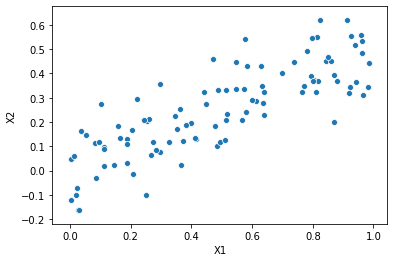

In [7]:

data = pd.DataFrame({'X1':x1,'X2':x2,'y':y})
corr = data.corr()
print(corr)
sns.scatterplot(data['X1'],data['X2'])

In [8]:
import statsmodels.formula.api as smf

## c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [9]:
result = smf.ols('y~X1 + X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.74
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           4.31e-13
Time:                        22:00:15   Log-Likelihood:                -123.67
No. Observations:                 100   AIC:                             253.3
Df Residuals:                      97   BIC:                             261.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8158      0.162     11.231      0.0

In [10]:

tmp = pd.DataFrame({'beta0':[2,1.8158],'beta1':[2,2.0758],'beta2':[0.3,0.7584]}) 
tmp.index = ['True','Predicted']
tmp

,beta0,beta1,beta2
True,2.0000,2.0000,0.3000
Predicted,1.8158,2.0758,0.7584


In [11]:
# since the predicted values for beta1  and beta2 are != 0. We reject the null hypothese for both the cases.

## (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [12]:
result = smf.ols('y~X1',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.72
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.93e-14
Time:                        22:03:10   Log-Likelihood:                -124.11
No. Observations:                 100   AIC:                             252.2
Df Residuals:                      98   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8229      0.161     11.295      0.0

In [13]:
# since beta1 != 0, we reject the null hypotheses, also p value is 0.

## e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [14]:

result = smf.ols('y~X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     50.53
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.92e-10
Time:                        22:03:44   Log-Likelihood:                -132.23
No. Observations:                 100   AIC:                             268.5
Df Residuals:                      98   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1250      0.157     13.572      0.0

In [15]:
# we reject the null hypothses, as coef != 0

In [16]:
# No, we can't say that the reults are contradicting each other. In the combined model in (c), the two predictors were 
# highly correlated, (that's how they were created, x2 is depencdent on x), and due to this collinearity effect, the 
# one of the predictors is not able to expain the results. While when we use separate models, there is no concept of collunearity.

In [17]:
x1 = np.append(x1,0.1)
x2 = np.append(x2,0.8)
y = np.append(y,6)

In [18]:
data = pd.DataFrame({'X1':x1,'X2':x2,'y':y})

In [19]:
# we can make a point here, that for x1, the value 0.1 is within the range of earlier value, however
# for x2 and y, 0.8 and 6, respecively, are outliers.

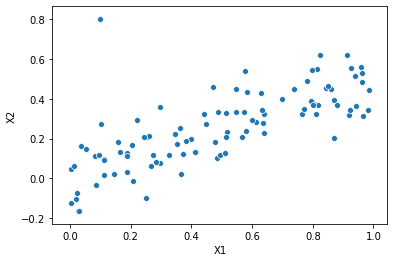

In [20]:
sns.scatterplot(data['X1'],data['X2'])

In [21]:
# we can see the newly added data point is an outlier, is separately located from the others.

In [22]:
result = smf.ols('y~X1 + X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.64e-12
Time:                        22:06:27   Log-Likelihood:                -129.50
No. Observations:                 101   AIC:                             265.0
Df Residuals:                      98   BIC:                             272.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8697      0.168     11.111      0.0

In [23]:
result = smf.ols('y~X1',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     56.46
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.60e-11
Time:                        22:06:42   Log-Likelihood:                -134.68
No. Observations:                 101   AIC:                             273.4
Df Residuals:                      99   BIC:                             278.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9419      0.175     11.116      0.0

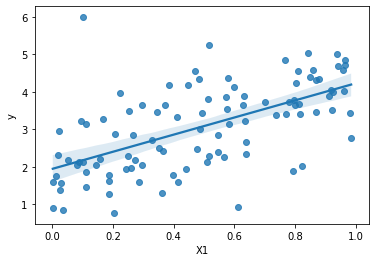

In [24]:

sns.regplot(data['X1'],data['y'])
# in this case, the point is 'outlier, since it has a very high value of y'

In [25]:
result = smf.ols('y ~ X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     59.84
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           8.79e-12
Time:                        22:07:21   Log-Likelihood:                -133.59
No. Observations:                 101   AIC:                             271.2
Df Residuals:                      99   BIC:                             276.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0962      0.154     13.604      0.0

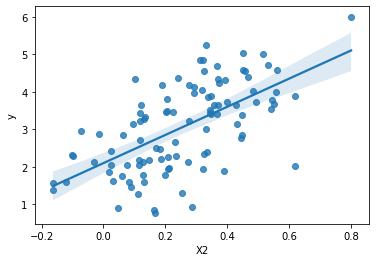

In [26]:
sns.regplot(data['X2'],data['y'])
# in this case, the righmost point tends to follow the general trend, but is far away from the distribtuion, 
# so, it is a high leverage point